In [1]:
from spacer3d.Ripley import CrossRipley, run_ripley, monte_carlo
from spacer3d.utils import plot_ripley
import scipy.stats as stats
import numpy as np
import pandas as pd

In [2]:
random_set1 = stats.uniform.rvs(loc=0, scale=100, size=(100,3))
random_set2 = stats.uniform.rvs(loc=0, scale=100, size=(100,3))

In [3]:
# Search radii
radii=np.arange(2, 67) 

# Binary mask to define sample space
volume_mask = np.ones((100, 100, 100))

# Number of Monte Carlo simulations to run
n_samples = 5

### Univariate processing

In [4]:
# Univariate analyzes clustering within a single point cloud
rand_rstats = monte_carlo(
    points_i=random_set1, # Numpy array containing 2D or 3D point locations
    mask=volume_mask, # binary mask of where to conduct the calculation
    radii=radii, # Set the range of search radii over which to calculate K values
    mode="3D", # Must match the shape of numpy arrays points_i
    n_samples=100, # Number of Monte Carlo simulations to perform
    n_processes=55, # Number of CPU cores over which you want to parallelize computation
    boundary_correction=False # Whether to apply boundary correction algorithm, must set 
                              # False if using MDSpacer normalization. Adds excess processing
)

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.05it/s]


In [5]:
# Parameters should match those used for monte carlo
results = run_ripley(
    points_i=random_set1, 
    points_j=random_set1, # for univariate, points_j == points_i
    mask=volume_mask,
    radii=radii,
    n_processes=55,
    boundary_correction=False
)
rstats = pd.DataFrame(results, columns=["Radius (r)", "K(r)", "L(r)", "H(r)"])

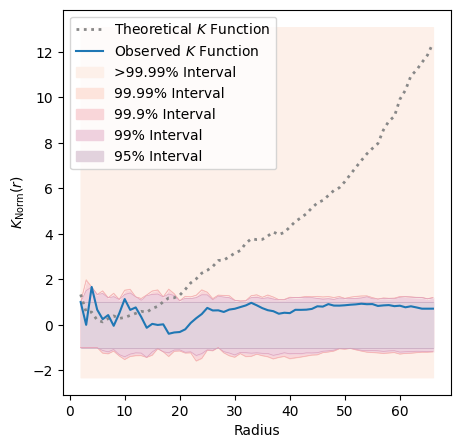

In [6]:
plot_ripley(
    rstats, # Data Ripley output
    rand_df=rand_rstats, # Monte Carlo Ripley output
    mode="3D",
    norm=True, # Apply MDSpacer normalization
    save=False, # Save to file
    output_folder="./ripley_plots", # Output file directory
    output_filename="ripley_figure.svg" # Output file name
)

### Bivariate processing

In [7]:
# Bivarate analyzes clustering between two point clouds
rand_rstats = monte_carlo(
    points_i=random_set1,
    points_j=random_set2, # Include second point cloud
    mask=volume_mask,
    radii=radii,
    mode="3D",
    n_samples=100,
    n_processes=55,
    boundary_correction=False
)

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  2.96it/s]


In [8]:
# Parameters should match those used for monte carlo
results = run_ripley(
    points_i=random_set1, 
    points_j=random_set2, # for bivariate, use second point cloud for points_j
    mask=volume_mask,
    radii=radii,
    n_processes=55,
    boundary_correction=False
)
rstats = pd.DataFrame(results, columns=["Radius (r)", "K(r)", "L(r)", "H(r)"])

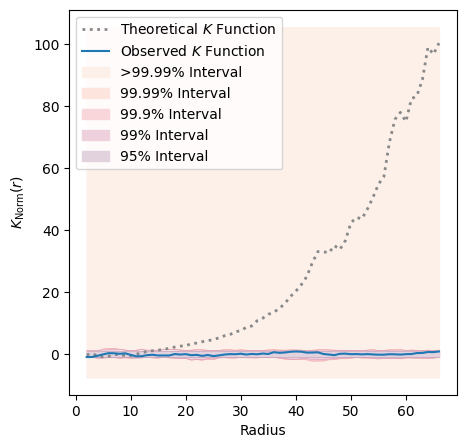

In [9]:
plot_ripley(
    rstats, # Data Ripley output
    rand_df=rand_rstats, # Monte Carlo Ripley output
    mode="3D",
    norm=True, # Apply MDSpacer normalization
    save=False, # Save to file
    output_folder="./ripley_plots", # Output file directory
    output_filename="ripley_figure.svg" # Output file name
)